<a href="https://colab.research.google.com/github/Ans365332/6may-file-example/blob/main/How_to_remove_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('/content/newplacementdata - newplacementdata.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: xlabel='placement_exam_marks'>

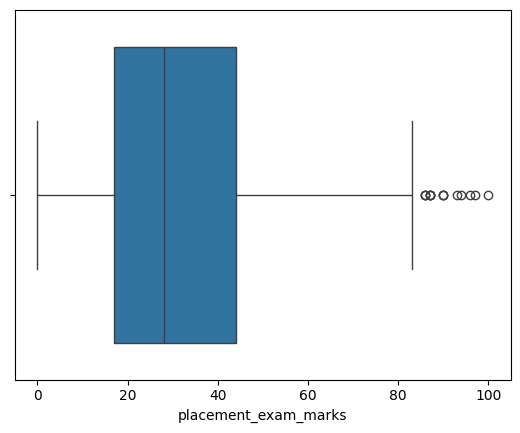

In [5]:
sns.boxplot(x=df['placement_exam_marks'])

In [6]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [7]:
percentile25

np.float64(17.0)

In [8]:
percentile75

np.float64(44.0)

In [9]:
IQR = percentile75 - percentile25
IQR

np.float64(27.0)

In [10]:
upper_limit = percentile75 + 1.5 * IQR
upper_limit

np.float64(84.5)

In [11]:
lower_limit = percentile25 - 1.5 * IQR
lower_limit

np.float64(-23.5)

# Finding our outliers

In [12]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [13]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [ ]:
# Trimming ---> 4(Lower)...1 , upper(25)....(50)  ---> here 1,50 are outliers -->
# Lower(4) <---> upper(25) mid data

# Capping ---> 4(Lower)....1 , upper(25)....(50) ---> capping lowest point(1)
# upper point upper point(50) ---> Range expand ----> outlier remove.

# 1.Trimming ( outlier removing techmique 1)

In [14]:
newdf=df[(df['placement_exam_marks']<upper_limit)]

In [15]:
newdf

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [ ]:
# comparision

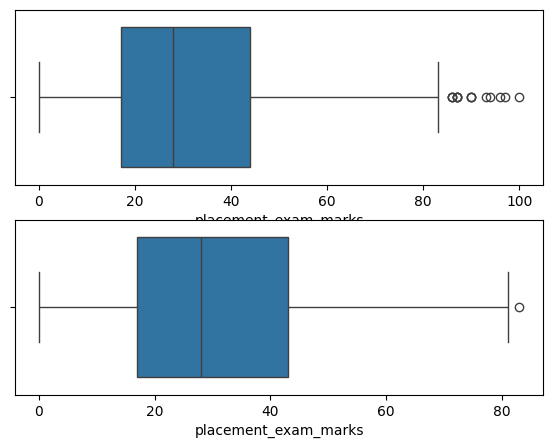

In [16]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x=newdf['placement_exam_marks'])
plt.show()

# 2. Capping (Outlier Removing Technique 2)

In [ ]:
# min = 5 , max=15

# min 4,3,1
# max = 20,30,50

# updated_min_value =1
# updated_max_value = 50


In [17]:
new_df_cap = df.copy()

In [18]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,

    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )

)

In [20]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


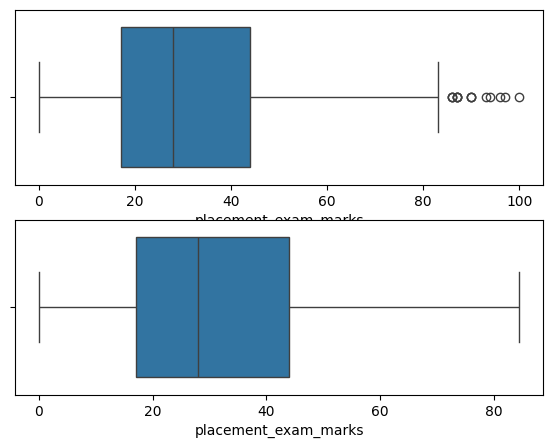

In [19]:
plt.figure(figsize = (15,5))

plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x=new_df_cap['placement_exam_marks'])
plt.show()

on titanic dataset

In [39]:
# by trimming -->

df=pd.read_csv('/content/titanic - titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [41]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [42]:
df['Age'].describe()

,Age
count,418.000000
mean,30.272590
std,12.634534
min,0.170000
25%,23.000000
50%,30.272590
75%,35.750000
max,76.000000


<Axes: xlabel='Age'>

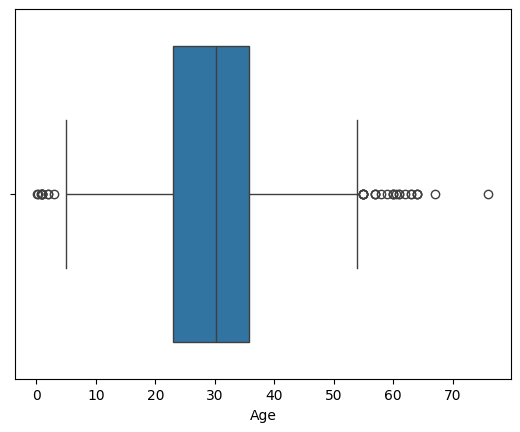

In [43]:
sns.boxplot(x=df['Age'])

In [44]:
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)

In [45]:
percentile25

np.float64(23.0)

In [46]:
percentile75

np.float64(35.75)

In [47]:
IQR = percentile75 - percentile25
IQR

np.float64(12.75)

In [48]:
upper_limit = percentile75 + 1.5 * IQR
upper_limit

np.float64(54.875)

In [49]:
lower_limit = percentile25 - 1.5 * IQR
lower_limit

np.float64(3.875)

In [50]:
df[df['Age']>upper_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
13,905,0,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,NaN,S
20,912,0,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S
77,969,1,1,"Cornell, Mrs. Robert Clifford (Malvina Helen L...",female,55.0,2,0,11770,25.7000,C101,S
81,973,0,1,"Straus, Mr. Isidor",male,67.0,1,0,PC 17483,221.7792,C55 C57,S
96,988,1,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
114,1006,1,1,"Straus, Mrs. Isidor (Rosalie Ida Blun)",female,63.0,1,0,PC 17483,221.7792,C55 C57,S
142,1034,0,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C


In [51]:
df[df['Age']<lower_limit]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
89,981,0,2,"Wells, Master. Ralph Lester",male,2.00,1,1,29103,23.0000,NaN,S
117,1009,1,3,"Sandstrom, Miss. Beatrice Irene",female,1.00,1,1,PP 9549,16.7000,G6,S
201,1093,0,3,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S
250,1142,1,2,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S
263,1155,1,3,"Klasen, Miss. Gertrud Emilia",female,1.00,1,1,350405,12.1833,NaN,S
281,1173,0,3,"Peacock, Master. Alfred Edward",male,0.75,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
284,1176,1,3,"Rosblom, Miss. Salli Helena",female,2.00,1,1,370129,20.2125,NaN,S
296,1188,1,2,"Laroche, Miss. Louise",female,1.00,1,2,SC/Paris 2123,41.5792,NaN,C
307,1199,0,3,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NaN,S
354,1246,1,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S


In [52]:
new_df=df[(df['Age']<upper_limit) & (df['Age']>lower_limit)]

In [53]:
new_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.00000,0,0,7538,9.2250,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


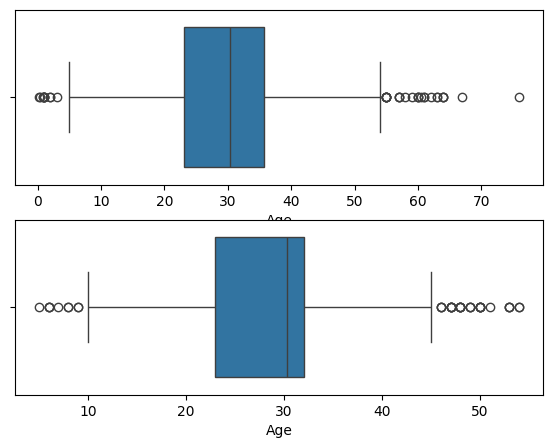

In [54]:
plt.figure(figsize=(15,5))

plt.subplot(222)
sns.boxplot(x=df['Age'])

plt.subplot(224)
sns.boxplot(x=new_df['Age'])
plt.show()

In [ ]:
# by capping

In [55]:
new_df_cap = df.copy()

In [56]:
new_df_cap['Age'] = np.where(
    new_df_cap['Age'] > upper_limit,upper_limit,
    np.where(
        new_df_cap['Age'] < lower_limit,
        lower_limit,
        new_df_cap['Age']
    )
)

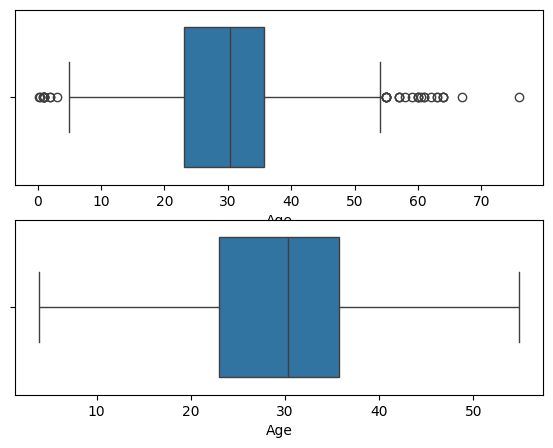

In [57]:
plt.figure(figsize=(15,5))

plt.subplot(222)
sns.boxplot(x=df['Age'])

plt.subplot(224)
sns.boxplot(x=new_df_cap['Age'])
plt.show()